<a href="https://colab.research.google.com/github/trankhanhduy20146093/TRI_TUE_NHAN_TAO/blob/main/Baitap_tuan_9_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import cifar10
from keras.models import Sequential
import matplotlib.pyplot as plt

(x_train, y_train) ,(x_test, y_test) = cifar10.load_data()

print("x_train: {}x{}x{}".format(x_train.shape[0], x_train.shape[1], x_train.shape[2]))

170498071/170498071 [==============================] - 2s 0us/step
x_train: 50000x32x32


In [4]:
print("x_test: {}x{}x{}".format(x_test.shape[0], x_test.shape[1], x_test.shape[2]))

x_test: 10000x32x32


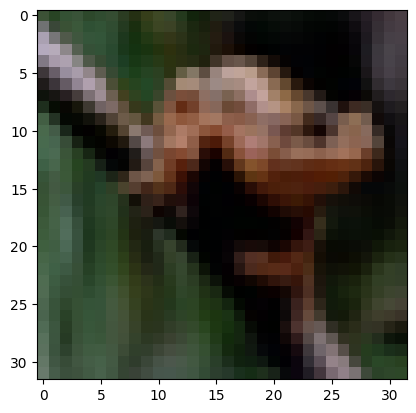

so nay la [6]


In [5]:
hinh = x_train[5000]
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show()
print('so nay la',y_train[5000])

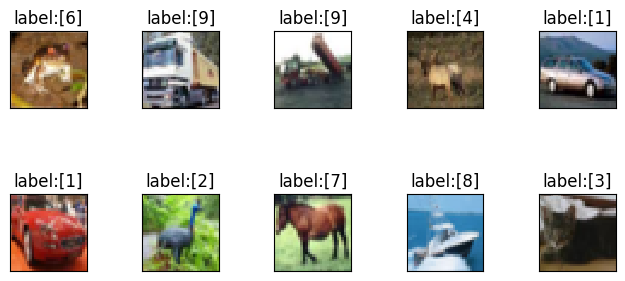

In [6]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("label:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [7]:
from keras.layers import Dense
from keras import models

model=Sequential()
model.add(Dense(512,activation ='relu',input_shape = (32*32*3,))) #do anh kich thuoc 32x32
model.add(Dense(512,activation ='relu')) #do anh kich thuoc 32x32
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [8]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255


In [9]:
#Converts a class vector (integers) to binary class matrix.
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [10]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)

print('test_acc:',test_acc)
print('test_loss',test_loss)
#cac buoc thuc hien, lay hinh scale, roi bo vo voi ham nhan dien predict

Epoch 1/10
391/391 [==============================] - 17s 41ms/step - loss: 2.0941 - accuracy: 0.2673
Epoch 2/10
391/391 [==============================] - 16s 40ms/step - loss: 1.7797 - accuracy: 0.3584
Epoch 3/10
391/391 [==============================] - 19s 48ms/step - loss: 1.6780 - accuracy: 0.3992
Epoch 4/10
391/391 [==============================] - 17s 44ms/step - loss: 1.6095 - accuracy: 0.4259
Epoch 5/10
391/391 [==============================] - 16s 42ms/step - loss: 1.5577 - accuracy: 0.4454
Epoch 6/10
391/391 [==============================] - 19s 48ms/step - loss: 1.5184 - accuracy: 0.4586
Epoch 7/10
391/391 [==============================] - 16s 40ms/step - loss: 1.4793 - accuracy: 0.4745
Epoch 8/10
391/391 [==============================] - 16s 41ms/step - loss: 1.4472 - accuracy: 0.4856
Epoch 9/10
391/391 [==============================] - 15s 39ms/step - loss: 1.4202 - accuracy: 0.4939
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 1.5642 

1/1 [==============================] - 0s 100ms/step
Predicted label is car


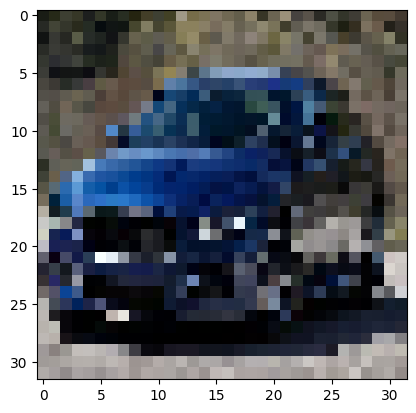

In [11]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

#load anh len va de o kich thuoc 32x32
img = load_img('car.jfif', target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img / 255

#np.argmax(model.predict(img),axis = -1)
labels = '''airplane car bird cat deer dog frog horse ship truck'''.split()

predicted_label = labels[model.predict(img).argmax()]

print("Predicted label is {}".format(predicted_label))